In [27]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import arkad
from arkad import BaseModel
from torch.utils.data import Dataset, DataLoader

import sys
import os

current_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.datasets import *
from src.models import *

In [28]:
dataset_train, dataset_test, label_encoder, classes = get_my_dataset()
print("Classes: ", label_encoder.keys())

None in 39
None in 81
None in 29


c:\Users\gabri\Documents\vector-search\src\datasets.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data['class'] = output_data['class'].map(label_encoder)


Classes:  dict_keys(['poder-internacional', 'poder-justica', 'poder-eleicoes', 'poder-congresso', 'poder-governo', 'poder-economia', 'poder-sportsmkt'])


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from src.train_test import *

# Defina os hiperparâmetros
hidden_dim = [768, 512, 256]
encoding_size = 128
learning_rate = 3e-4
num_epochs = 25
batch_size = 64

# Instancie o modelo
model = VAE(
    hidden_dim=hidden_dim,
    encoding_size=encoding_size,
    output_dim_classifier=len(classes),
    dropout=0.5,
    batch_norm_1d=True
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
reconstruction_loss_fn = nn.MSELoss()
classification_loss_fn = nn.CrossEntropyLoss()

In [31]:
history_train, history_val, history_metrics_train, history_metrics_val = train(model,
                                                                               dataset_train,
                                                                               optimizer,
                                                                               num_epochs,
                                                                               batch_size,
                                                                               criterions=[reconstruction_loss_fn, classification_loss_fn],
                                                                               validation_split=0.1)

Dataset dividido em 3964 amostras para treinamento e 440 para validação.


0it [00:00, ?it/s]

62it [00:51,  1.19it/s]
7it [00:05,  1.25it/s]


Epoch [1/25]
Loss: 3.9796, KL Loss: 0.0515, Recon Loss: 0.0666, Classification Loss: 3.8615
Validation Loss: 3.8941, Validation KL Loss: 0.0049, Validation Recon Loss: 0.0711, Validation Classification Loss: 3.8182
Accuracy: 0.1819, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.2273, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:51,  1.19it/s]
7it [00:05,  1.19it/s]


Epoch [2/25]
Loss: 3.6567, KL Loss: 0.0642, Recon Loss: 0.0597, Classification Loss: 3.5328
Validation Loss: 3.2559, Validation KL Loss: 0.0057, Validation Recon Loss: 0.0690, Validation Classification Loss: 3.1812
Accuracy: 0.2480, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.3705, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:53,  1.16it/s]
7it [00:05,  1.18it/s]


Epoch [3/25]
Loss: 3.2267, KL Loss: 0.0485, Recon Loss: 0.0583, Classification Loss: 3.1198
Validation Loss: 3.1346, Validation KL Loss: 0.0028, Validation Recon Loss: 0.0670, Validation Classification Loss: 3.0648
Accuracy: 0.3900, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.4250, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:56,  1.11it/s]
7it [00:06,  1.14it/s]


Epoch [4/25]
Loss: 3.0738, KL Loss: 0.0341, Recon Loss: 0.0574, Classification Loss: 2.9823
Validation Loss: 2.8115, Validation KL Loss: 0.0035, Validation Recon Loss: 0.0648, Validation Classification Loss: 2.7431
Accuracy: 0.4243, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.5386, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:56,  1.11it/s]
7it [00:06,  1.11it/s]


Epoch [5/25]
Loss: 2.5763, KL Loss: 0.0539, Recon Loss: 0.0568, Classification Loss: 2.4656
Validation Loss: 2.0884, Validation KL Loss: 0.0039, Validation Recon Loss: 0.0640, Validation Classification Loss: 2.0205
Accuracy: 0.5255, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.5614, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [01:04,  1.04s/it]
7it [00:06,  1.03it/s]


Epoch [6/25]
Loss: 2.2287, KL Loss: 0.0376, Recon Loss: 0.0565, Classification Loss: 2.1346
Validation Loss: 1.8985, Validation KL Loss: 0.0016, Validation Recon Loss: 0.0622, Validation Classification Loss: 1.8347
Accuracy: 0.5714, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.6250, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [01:04,  1.04s/it]
7it [00:06,  1.01it/s]


Epoch [7/25]
Loss: 2.0634, KL Loss: 0.0227, Recon Loss: 0.0562, Classification Loss: 1.9846
Validation Loss: 1.7512, Validation KL Loss: 0.0016, Validation Recon Loss: 0.0614, Validation Classification Loss: 1.6881
Accuracy: 0.6317, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7136, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [01:03,  1.02s/it]
7it [00:07,  1.03s/it]


Epoch [8/25]
Loss: 1.8776, KL Loss: 0.0147, Recon Loss: 0.0561, Classification Loss: 1.8068
Validation Loss: 1.4494, Validation KL Loss: 0.0010, Validation Recon Loss: 0.0616, Validation Classification Loss: 1.3868
Accuracy: 0.6688, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7409, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [01:02,  1.01s/it]
7it [00:06,  1.04it/s]


Epoch [9/25]
Loss: 1.7029, KL Loss: 0.0089, Recon Loss: 0.0561, Classification Loss: 1.6379
Validation Loss: 1.3747, Validation KL Loss: 0.0011, Validation Recon Loss: 0.0608, Validation Classification Loss: 1.3128
Accuracy: 0.6998, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7500, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.05it/s]
7it [00:06,  1.09it/s]


Epoch [10/25]
Loss: 1.5853, KL Loss: 0.0051, Recon Loss: 0.0559, Classification Loss: 1.5243
Validation Loss: 1.2384, Validation KL Loss: 0.0005, Validation Recon Loss: 0.0602, Validation Classification Loss: 1.1776
Accuracy: 0.7240, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7705, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:57,  1.07it/s]
7it [00:06,  1.08it/s]


Epoch [11/25]
Loss: 1.5020, KL Loss: 0.0028, Recon Loss: 0.0559, Classification Loss: 1.4434
Validation Loss: 1.2345, Validation KL Loss: 0.0003, Validation Recon Loss: 0.0600, Validation Classification Loss: 1.1742
Accuracy: 0.7422, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7932, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.06it/s]
7it [00:06,  1.09it/s]


Epoch [12/25]
Loss: 1.4741, KL Loss: 0.0017, Recon Loss: 0.0558, Classification Loss: 1.4167
Validation Loss: 1.1692, Validation KL Loss: 0.0004, Validation Recon Loss: 0.0599, Validation Classification Loss: 1.1089
Accuracy: 0.7503, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8023, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.05it/s]
7it [00:06,  1.08it/s]


Epoch [13/25]
Loss: 1.3978, KL Loss: 0.0011, Recon Loss: 0.0557, Classification Loss: 1.3410
Validation Loss: 1.1087, Validation KL Loss: 0.0002, Validation Recon Loss: 0.0594, Validation Classification Loss: 1.0490
Accuracy: 0.7583, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8091, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.06it/s]
7it [00:06,  1.09it/s]


Epoch [14/25]
Loss: 1.4001, KL Loss: 0.0008, Recon Loss: 0.0558, Classification Loss: 1.3436
Validation Loss: 1.0664, Validation KL Loss: 0.0001, Validation Recon Loss: 0.0598, Validation Classification Loss: 1.0065
Accuracy: 0.7596, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8250, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.05it/s]
7it [00:06,  1.04it/s]


Epoch [15/25]
Loss: 1.3666, KL Loss: 0.0005, Recon Loss: 0.0557, Classification Loss: 1.3105
Validation Loss: 1.1246, Validation KL Loss: 0.0001, Validation Recon Loss: 0.0593, Validation Classification Loss: 1.0652
Accuracy: 0.7772, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.7977, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.06it/s]
7it [00:06,  1.06it/s]


Epoch [16/25]
Loss: 1.3157, KL Loss: 0.0003, Recon Loss: 0.0556, Classification Loss: 1.2597
Validation Loss: 1.0901, Validation KL Loss: 0.0001, Validation Recon Loss: 0.0591, Validation Classification Loss: 1.0309
Accuracy: 0.7828, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8295, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.05it/s]
7it [00:06,  1.09it/s]


Epoch [17/25]
Loss: 1.2505, KL Loss: 0.0002, Recon Loss: 0.0557, Classification Loss: 1.1946
Validation Loss: 0.9722, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0593, Validation Classification Loss: 0.9128
Accuracy: 0.7972, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8591, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.04it/s]
7it [00:06,  1.07it/s]


Epoch [18/25]
Loss: 1.2835, KL Loss: 0.0001, Recon Loss: 0.0557, Classification Loss: 1.2277
Validation Loss: 1.0394, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0589, Validation Classification Loss: 0.9805
Accuracy: 0.7876, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8364, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.05it/s]
7it [00:06,  1.03it/s]


Epoch [19/25]
Loss: 1.2245, KL Loss: 0.0001, Recon Loss: 0.0556, Classification Loss: 1.1689
Validation Loss: 0.9765, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0590, Validation Classification Loss: 0.9175
Accuracy: 0.8035, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8523, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.04it/s]
7it [00:06,  1.08it/s]


Epoch [20/25]
Loss: 1.2002, KL Loss: 0.0000, Recon Loss: 0.0555, Classification Loss: 1.1446
Validation Loss: 0.9999, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0587, Validation Classification Loss: 0.9411
Accuracy: 0.8133, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8386, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:58,  1.05it/s]
7it [00:06,  1.04it/s]


Epoch [21/25]
Loss: 1.1987, KL Loss: 0.0000, Recon Loss: 0.0555, Classification Loss: 1.1432
Validation Loss: 1.0340, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0589, Validation Classification Loss: 0.9751
Accuracy: 0.8073, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8318, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.04it/s]
7it [00:06,  1.06it/s]


Epoch [22/25]
Loss: 1.1830, KL Loss: 0.0000, Recon Loss: 0.0555, Classification Loss: 1.1274
Validation Loss: 0.9647, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0589, Validation Classification Loss: 0.9058
Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8545, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.05it/s]
7it [00:06,  1.08it/s]


Epoch [23/25]
Loss: 1.1845, KL Loss: 0.0000, Recon Loss: 0.0554, Classification Loss: 1.1290
Validation Loss: 0.9552, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0587, Validation Classification Loss: 0.8965
Accuracy: 0.8126, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8545, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.05it/s]
7it [00:06,  1.08it/s]


Epoch [24/25]
Loss: 1.1677, KL Loss: 0.0000, Recon Loss: 0.0554, Classification Loss: 1.1123
Validation Loss: 0.8825, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0586, Validation Classification Loss: 0.8239
Accuracy: 0.8194, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8659, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


62it [00:59,  1.05it/s]
7it [00:06,  1.08it/s]


Epoch [25/25]
Loss: 1.1047, KL Loss: 0.0000, Recon Loss: 0.0554, Classification Loss: 1.0493
Validation Loss: 0.9983, Validation KL Loss: 0.0000, Validation Recon Loss: 0.0585, Validation Classification Loss: 0.9398
Accuracy: 0.8267, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
Validation Accuracy: 0.8386, Validation Precision: 0.0000, Validation Recall: 0.0000, Validation F1: 0.0000
---


In [48]:
from tqdm import tqdm

test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

all_preds = []
all_labels = []
all_codings = []
all_head = []
all_head_pre_train = []
all_reconstructions = []
all_mu = []
all_log_var = []
model = model.to('cuda')
model.eval()

with torch.no_grad():
    for batch_idx, data in tqdm(enumerate(test_dataloader)):
        input_ids, attention_mask, y = data
        input_ids = input_ids.to('cuda')
        attention_mask = attention_mask.to('cuda')
        y = y.to('cuda')
        y = y.squeeze(-1)
        y = y.long()
        
        reconstructed_x, mu, log_var, head_1, head_2, y_hat = model(input_ids, attention_mask)
        _, _, codings, _, _ = model.encoder(input_ids, attention_mask)
        preds = torch.argmax(y_hat, dim=1)
        all_head.append(head_2)
        all_head_pre_train.append(head_1)
        all_reconstructions.append(reconstructed_x)
        all_mu.append(mu)
        all_log_var.append(log_var)
        all_codings.append(codings)
        all_preds.append(preds)
        all_labels.append(y)

18it [00:18,  1.00s/it]


In [49]:
all_preds_np = torch.concat(all_preds).cpu().numpy()
all_labels_np = torch.concat(all_labels).cpu().numpy()
all_codings_np = torch.concat(all_codings).cpu().numpy()
all_head_np = torch.concat(all_head).cpu().numpy()
all_head_pre_train_np = torch.concat(all_head_pre_train).cpu().numpy()
all_reconstructions_np = torch.concat(all_reconstructions).cpu().numpy()
all_mu_np = torch.concat(all_mu).cpu().numpy()
all_log_var_np = torch.concat(all_log_var).cpu().numpy()
all_preds_np.shape, all_labels_np.shape

((1101,), (1101,))

In [50]:
accuracy = accuracy_score(all_labels_np, all_preds_np)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8302


In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
all_codings_tsne = tsne.fit_transform(all_mu_np)

In [51]:

tsne_pre = TSNE(n_components=2, random_state=42)
all_codings_pre_tsne = tsne.fit_transform(all_head_pre_train_np)


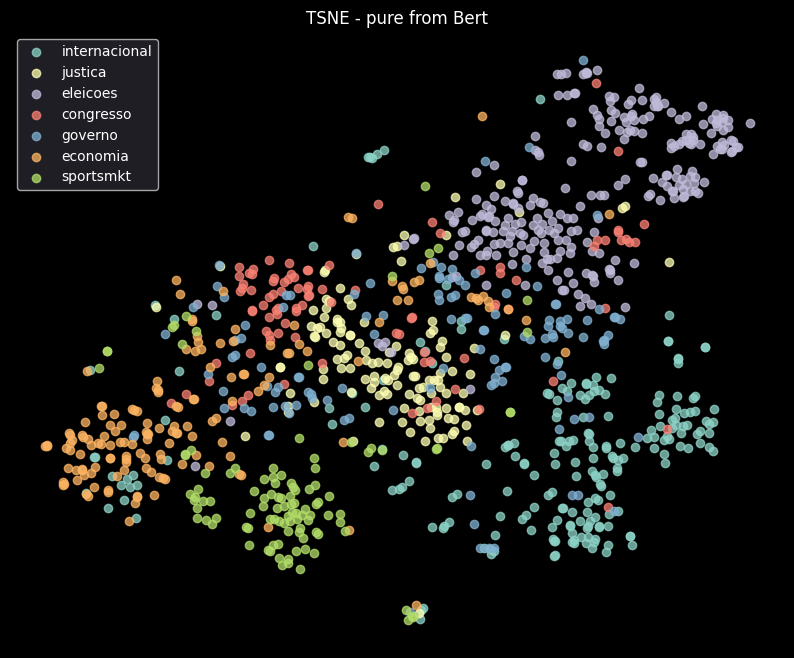

In [53]:
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#26262e' 

plt.figure(figsize=(10, 8))
plt.title(r'TSNE - pure from Bert')
for i, classe in enumerate(label_encoder):
    plt.scatter(all_codings_pre_tsne[:, 0][all_labels_np == i], all_codings_pre_tsne[:, 1][all_labels_np == i], label=classe.split('-')[1], alpha=0.75)
plt.legend()
plt.axis('off')
plt.show()

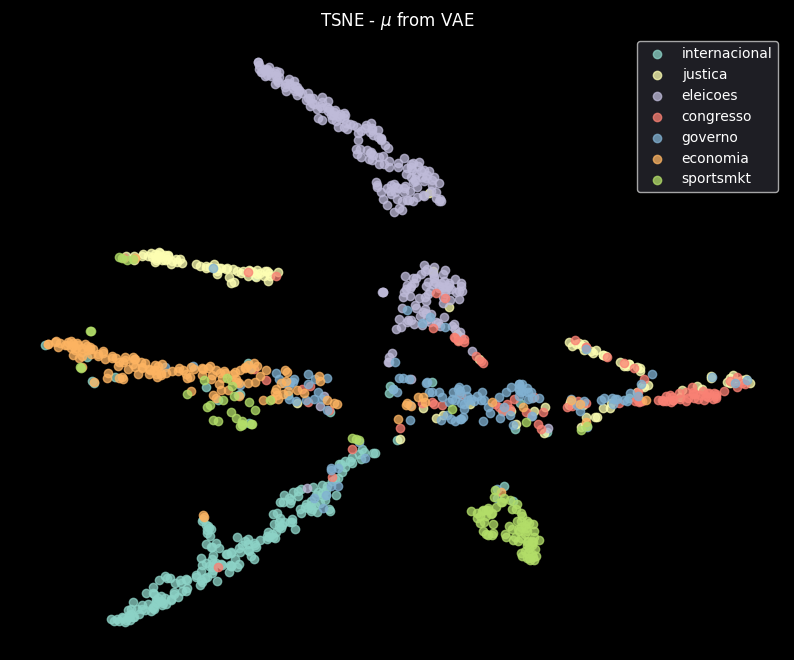

In [56]:
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#26262e' 

plt.figure(figsize=(10, 8))
plt.title(r'TSNE - $\mu$ from VAE')
for i, classe in enumerate(label_encoder):
    plt.scatter(all_codings_tsne[:, 0][all_labels_np == i], all_codings_tsne[:, 1][all_labels_np == i], label=classe.split('-')[1], alpha=0.75)
plt.legend()
plt.axis('off')
plt.show()

In [37]:
# Salvar os parâmetros do modelo
torch.save(model.state_dict(), '../models/vae_model_state_dict_2.pth')

In [38]:
# Recrie a instância do modelo (use os mesmos hiperparâmetros)
model_loaded = VAE(
    hidden_dim=hidden_dim,
    encoding_size=encoding_size,
    output_dim_classifier=len(classes),
    dropout=0.5,
    batch_norm_1d=True
)

# Carregue os parâmetros salvos
model_loaded.load_state_dict(torch.load('../models/vae_model_state_dict_2.pth'))

# Mova o modelo para o dispositivo adequado (CPU ou GPU)
model_loaded.to(device)

C:\Users\gabri\AppData\Local\Temp\ipykernel_56440\3963041829.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_loaded.load_state_dict(torch.load('../models/vae_mode

VAE(
  (encoder): Encoder(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(105879, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
              